In [1]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [14]:
#Import any library here only.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from tqdm import tqdm
from PIL import Image

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [3]:
#Setup and check a gpu connection.
! unzip OpenCodeData.zip

Archive:  OpenCodeData.zip
   creating: OpenCodeData/OpenCodeData/
   creating: OpenCodeData/OpenCodeData/INFECTED/
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_13.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_6.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_7.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_8.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_9.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person10_virus_35.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_475.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_477.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_478.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_479.jpeg  

In [4]:
''' Do not change this cell '''
check_gpu()

PLease connect GPU


In [11]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.
images = []
labels = []
viral_ct=0
bacteria_ct=0
normal_ct=0
infected_ct=0
def process_images(dir,label):
  filename = os.listdir(dir)
  for img in tqdm(filename):
    path = os.path.join(dir,img)
    labels.append(label)
    image = cv2.imread(path)
    images.append(image)

def infected_category(dir):
  filename = os.listdir(dir)
  for img in tqdm(filename):
    path = os.path.join(dir,img)
    if 'virus' in img:
      labels.append("virus")
    elif 'bacteria' in img:
      labels.append("bacteria")
    else:
      labels.append("unidentified")
    image = cv2.imread(path)
    images.append(image)

process_images('/content/OpenCodeData/OpenCodeData/INFECTED',"infected")
process_images('/content/OpenCodeData/OpenCodeData/NORMAL',"normal")
infected_category('/content/OpenCodeData/OpenCodeData/INFECTED')
viral_ct+=labels.count("virus")
bacteria_ct+=labels.count("bacteria")
normal_ct+=labels.count("normal")
infected_ct+=labels.count("infected")

print(f"\n Viral Image Count: {viral_ct}")
print(f"\n Bacteria Image Count: {bacteria_ct}")
print(f"\n Normal Image Count: {normal_ct}")
print(f"\n Infected Image Count: {infected_ct}")



100%|██████████| 390/390 [00:03<00:00, 128.32it/s]


 Viral Image Count: 148

 Bacteria Image Count: 242

 Normal Image Count: 234

 Infected Image Count: 390


In [10]:
''' Do not change this cell '''
check_data("task1")

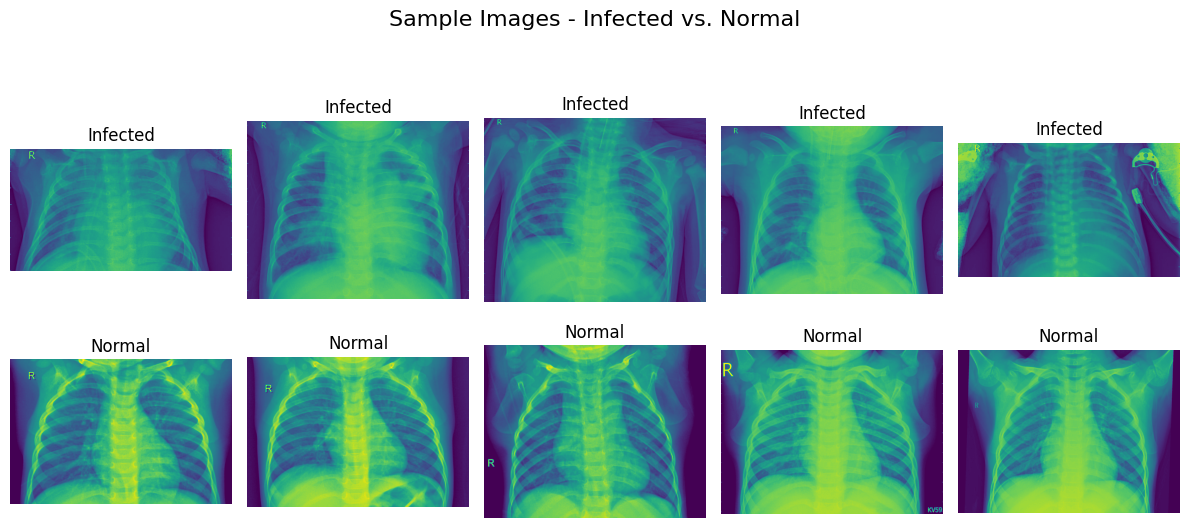

In [19]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

infected = ['/content/OpenCodeData/OpenCodeData/INFECTED' +"/"+ img for img in os.listdir('/content/OpenCodeData/OpenCodeData/INFECTED')]
normal = ['/content/OpenCodeData/OpenCodeData/NORMAL' +"/"+ img for img in os.listdir('/content/OpenCodeData/OpenCodeData/NORMAL')]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    img = Image.open(infected[i])
    plt.imshow(img)
    plt.title("Infected")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    img = Image.open(normal[i])
    plt.imshow(img)
    plt.title("Normal")
    plt.axis('off')

plt.suptitle('Sample Images - Infected vs. Normal', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

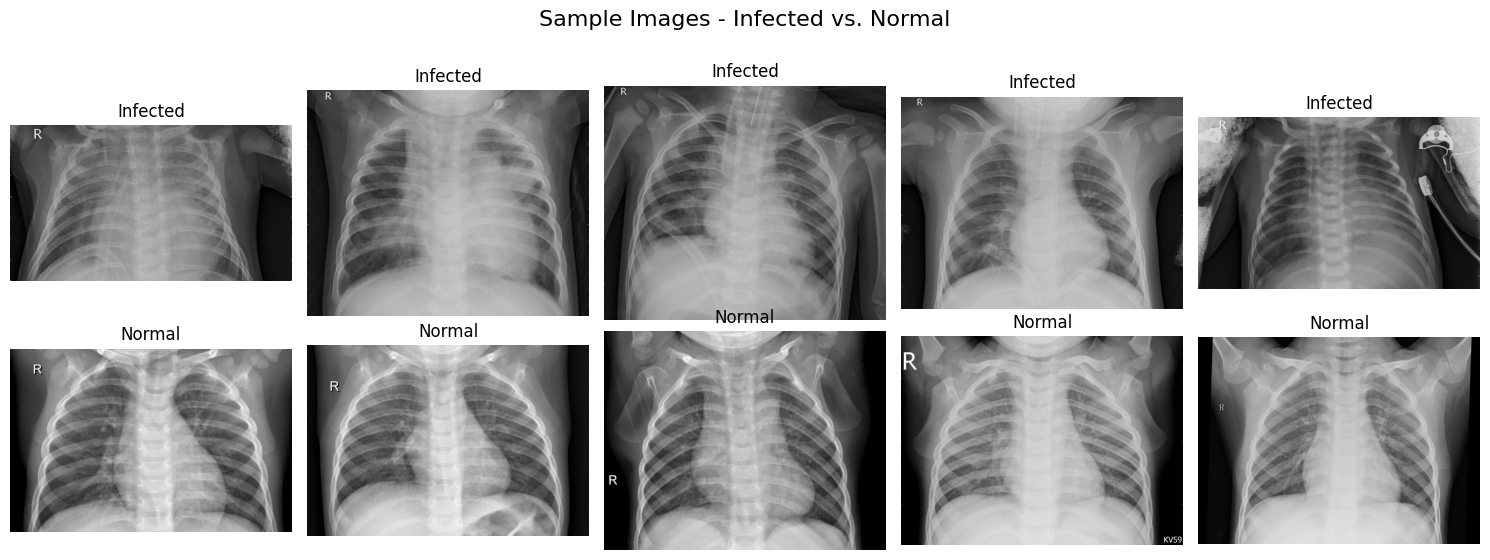

In [22]:
infected_folder = '/content/OpenCodeData/OpenCodeData/INFECTED'
normal_folder = '/content/OpenCodeData/OpenCodeData/NORMAL/'

infected_images = [Image.open(os.path.join(infected_folder, img)).convert('RGB') for img in os.listdir(infected_folder)[:5]]
normal_images = [Image.open(os.path.join(normal_folder, img)).convert('RGB') for img in os.listdir(normal_folder)[:5]]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axes[0, i].imshow(infected_images[i])
    axes[0, i].set_title("Infected")
    axes[0, i].axis('off')

    axes[1, i].imshow(normal_images[i])
    axes[1, i].set_title("Normal")
    axes[1, i].axis('off')
plt.suptitle('Sample Images - Infected vs. Normal', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()